In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:


"""
reads in a csv file, converts labels into the correct form
then splits the labels from the data and returns 2 seperate arrays
"""
def load_file(filename):
    data = np.genfromtxt(filename,delimiter=',')
    # convert the labels into the correct form
    #for row in data:
    #    if row[0] == -1.0:
    #        row[0] = 0
    #    elif row[0] == 1.0:
    #        row[0] = 1
            

    # y is the first column i.e the labels
    y = data[:,0]
    # X is the remainder of the data
    X = data[:,2:]
 
    return y,X

In [3]:
y, X = load_file("dota2Train.csv")

In [132]:
def count_values(column,X):
    data = X

    print("processing...")
    values = dict()
    for val in data.T[column]:
        if val in values.keys():
            values[val] += 1
        else:
            values[val] = 1
        
    x, y = zip(*sorted(values.items(), key=lambda x: x[0]))
    plt.bar(x,y)

processing...


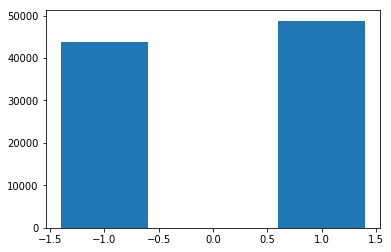

In [133]:
X[:,0] = y
count_values(0,X)
#count_values(1,X)
#count_values(2,X)
#count_values(3,X)


In [155]:
import numpy as np 

class logistic_regressor():
    # reguralisation factor
    l = 0.05

    step_size = 0.03
    #accuracy = 0

    def __init__(self,filename,testfile):
        self.data = np.genfromtxt(filename,delimiter=',')
        # convert the labels into the correct form
        for row in self.data:
            if row[0] == -1:
                row[0] = 0
            
       
        # we add in a column of ones as theta 0
        
        b = np.ones((self.data.shape[0],self.data.shape[1]+1-3))
        b[:,1:] = np.delete(self.data,[1,2,3],1)
        b[:,[0,1]] = b[:,[1,0]]
        self.data = b
        
        self.test_data = np.genfromtxt(testfile,delimiter=',')
        # convert the labels into the correct form
        for row in self.test_data:
            if row[0] == -1:
                row[0] = 0
            
       
        # we add in a column of ones as theta 0
        
        b = np.ones((self.test_data.shape[0],self.test_data.shape[1]+1-3))
        b[:,1:] = np.delete(self.test_data,[1,2,3],1)
        b[:,[0,1]] = b[:,[1,0]]
        self.test_data = b
        
        print(self.data[:10])
        print(self.data.shape[1])

        self.num_rows = self.data.shape[0]
        # we don't count the labels or params as part of the columns
        self.num_cols = self.data.shape[1]-2
        self.init_params()
        print("norm:",np.linalg.norm(self.params))

    def sigmoid(self,z):
        result = 1/(1+np.exp(-z))
        return result

    def sigmoid_deriv(self,z):
        result = self.sigmoid(z) * (1-self.sigmoid(z))
        return result

        #s = sigmoid(z)
        #return s * (1-s)

    def init_params(self):
        # generates an array of numbers in the range [0,1]
        self.params = np.random.rand(self.num_cols)
        # we want the params in the range [-1,1]
        self.params = self.params*2-1

        self.params *= 1

    def cost(self):
        result = 0
        for row in self.data:
            y = row[0]
            d_product = np.dot(self.params,row[2:])
            h_theta = self.sigmoid(d_product)
            #print("cost: d_product =", d_product, "h_theta = ", h_theta)
            # we get bugs if h_theta is exactly 1 or 0
            if h_theta == 1:
                h_theta = 1-10e-5
            elif h_theta == 0:
                h_theta = 10e-5

            #print("h_theta:", h_theta, "label:", y)
            
            temp = y*np.log(h_theta) + (1-y)*np.log(1-h_theta) 
            
            result = result + temp 

        result = -result + self.l*np.sum(np.square(row)) 
        return result

    def MSE(self):
        count = 0
        total = 0
        for row in self.data:
            label = row[0]
            d_product = np.dot(self.params,row[2:])
            h_theta = self.sigmoid(d_product)
            if h_theta > 0:
                prediction = 1
            else:
                prediction = 0

            if prediction == label:
                count = count + 1

            total = total + (h_theta - label)**2

        #self.accuracy = count/self.num_rows

        total = (1/2*self.num_rows)*total

        return total



    def gradient_descent(self):
        
        for row in self.data:
            old_params = self.params+0
            y = row[0]

            h_theta = self.sigmoid(np.dot(old_params,row[2:]))

            new_params = np.zeros_like(self.params)
            new_params[0] = old_params[0] - self.step_size*(self.sigmoid(h_theta) - row[0])
            
            for k in range(1,self.num_cols):
                self.params[k] = old_params[k] - self.step_size * ((h_theta-y)*row[k] + self.l*old_params[k])
            
    def train(self,tol):
        print("training...")
        diff = tol*10

        iteration_num = 0

        while diff > tol :
            old_params = self.params + 0

            self.gradient_descent()

            iteration_num = iteration_num + 1
            diff = np.linalg.norm(self.params-old_params)

            if iteration_num % 1 == 0:

                print("iteration:", iteration_num," cost:", self.cost(), "  diff:", diff,"  accuracy:", self.accuracy())
            
        print("____________________________________________________________________________________________________________")
        print("final iteration:", iteration_num," cost:", self.cost(), "  diff:", diff,"  accuracy:", self.accuracy())

            #print("prediction:", prediction, "actual", label)


    def accuracy(self):
        count = 0
        split_count = 0
        for row in self.data:

            label = row[0]

            if label == 1:
                split_count = split_count + 1

            prediction = self.sigmoid(np.dot(self.params,row[2:]))
            if prediction > 0.5:
                prediction = 1
            else:
                prediction = 0

            if prediction == label:
                count = count + 1

        print("split is :",split_count,self.data.shape[0]-split_count, split_count/self.data.shape[0])
        #self.accuracy = count/self.data.shape[0]
        return count/self.num_rows
    
    def test_accuracy(self):
        count = 0
        split_count = 0
        for row in self.test_data:

            label = row[0]

            if label == 1:
                split_count = split_count + 1

            prediction = self.sigmoid(np.dot(self.params,row[2:]))
            if prediction > 0.5:
                prediction = 1
            else:
                prediction = 0

            if prediction == label:
                count = count + 1

        print("split is :",split_count,self.test_data.shape[0]-split_count, split_count/self.test_data.shape[0])
        #self.accuracy = count/self.data.shape[0]
        return count/self.test_data.shape[0]
    
    def predict_sample(self,size):
        count = 0
        split_count = 0
        for k in range(size):         
            row = self.data[np.random.randint(0,self.test_data.shape[0])]

            label = row[0]

            if label == 1:
                split_count = split_count + 1

            prediction = self.sigmoid(np.dot(self.params,row[2:]))
            if prediction > 0.5:
                prediction = 1
            else:
                prediction = 0

            if prediction == label:
                count = count + 1
                
            print("prediction: ", prediction," truth: ",label)
            
    def alt_predict_sample(self,size):
        count = 0
        split_count = 0
        for k in range(size):         
            row = self.data[np.random.randint(0,self.test_data.shape[0])]

            label = row[0]

            if label == 1:
                split_count = split_count + 1

            prediction = self.sigmoid(np.dot(self.params,row[2:]))
            if prediction > 0.5:
                prediction = 0
            else:
                prediction = 1

            if prediction == label:
                count = count + 1
                
            print("prediction: ", prediction," truth: ",label)
            
    def confusion_matrix(self):
        count = 0
        split_count = 0
        true_pos = 0
        true_neg = 0
        false_pos = 0
        false_neg = 0
        
        for row in self.test_data:        
            label = row[0]

            prediction = self.sigmoid(np.dot(self.params,row[2:]))
            if prediction > 0.5:
                prediction = 1
            else:
                prediction = 0

            if prediction == label and label == 1:
                true_pos += 1
            elif prediction == 0 and label == 0:
                true_neg += 1
            elif prediction == 0 and label == 1:
                false_neg += 1
            elif prediction == 1 and label == 0:
                false_pos += 1
                
        print("true_pos: ", true_pos," false_pos: ",false_pos)
        print("false_neg: ", false_neg," true_neg: ",true_neg)


lr = logistic_regressor("dota2Train.csv","dota2Test.csv")
lr.train(10e-5)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
115
norm: 6.105115921485573
training...
split is : 48782 43868 0.5265191581219644
iteration: 1  cost: 69279.55134715776   diff: 6.370760236655304   accuracy: 0.4888397193739881
split is : 48782 43868 0.5265191581219644
iteration: 2  cost: 69279.55134715776   diff: 4.805323465791478e-16   accuracy: 0.4888397193739881
____________________________________________________________________________________________________________
split is : 48782 43868 0.5265191581219644
final iteration: 2  cost: 69279.55134715776   diff: 4.805323465791478e-16   accuracy: 0.4888397193739881


In [140]:
print("accuracy on seen data is:", lr.accuracy())
print("accuracy on unseen data is:", lr.test_accuracy())


split is : 48782 43868 0.5265191581219644
accuracy on seen data is: 0.48977873718294657
split is : 5502 4792 0.5344861084126675
accuracy on unseen data is: 0.4655138915873324


In [137]:
lr.predict_sample(10)

prediction:  1  truth:  0.0
prediction:  1  truth:  0.0
prediction:  0  truth:  1.0
prediction:  1  truth:  1.0
prediction:  0  truth:  1.0
prediction:  1  truth:  1.0
prediction:  0  truth:  1.0
prediction:  1  truth:  1.0
prediction:  0  truth:  0.0
prediction:  1  truth:  0.0


In [153]:
lr.confusion_matrix()

true_pos:  2673  false_pos:  2505
false_neg:  2829  true_neg:  2287
